## Phase 1 : Chargement des Librairies et des Données

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour un affichage plus joli des graphiques
sns.set(style="whitegrid")

In [3]:
# Chargement du jeu de données original
df_original = pd.read_csv('fichier-de-donnees-numeriques-69202f25dea8b267811864.csv')

In [4]:
# Affichage des 5 premières lignes pour un premier aperçu
print("Shape du DataFrame original:", df_original.shape)
df_original.head()

Shape du DataFrame original: (10000, 9)


,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
0,73,161.1,67.3,857,NaN,0.11,615.0,1377.97,13157.101646
1,44,168.2,74.9,5245,2.0,0.79,NaN,10000.00,32408.309272
2,71,160.3,45.5,3792,0.0,0.13,NaN,5000.00,17975.461375
3,62,161.9,87.7,3291,NaN,0.32,NaN,10000.00,16004.737731
4,18,178.0,77.6,3893,NaN,0.66,NaN,NaN,10437.682760


## Phase 2 : Analyse Exploratoire des Données Brutes

À ce stade, nous n'inspectons que les données sans les modifier. L'objectif est de comprendre leur état initial pour planifier le nettoyage.

### 2.1. Analyse des Valeurs Manquantes


Text(0.5, 1.0, 'Matrice de Nullité des Données Originales')

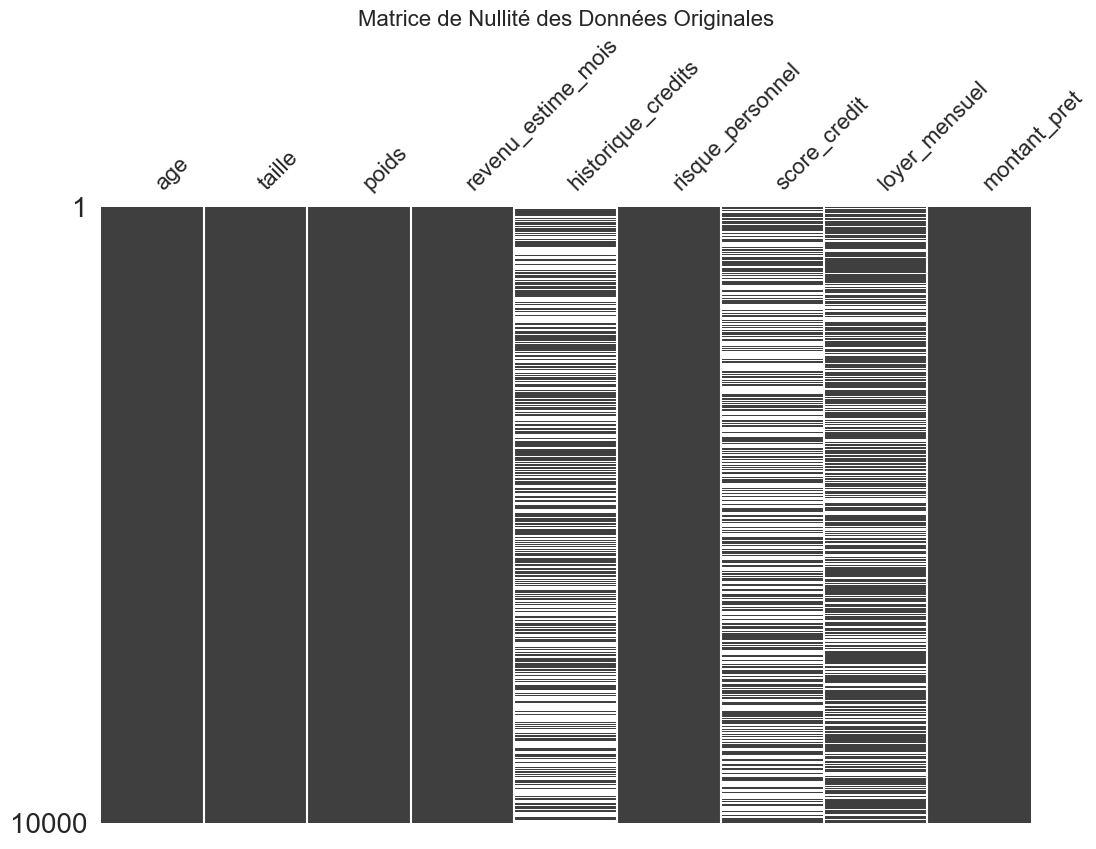

In [5]:
# Matrice de nullité : une vue d'ensemble des données manquantes
# Les lignes blanches indiquent des données manquantes.
msno.matrix(df_original, figsize=(12, 8), sparkline=False)
plt.title('Matrice de Nullité des Données Originales', fontsize=16)

**Observation :** La matrice confirme visuellement que `historique_credits` et `score_credit` ont de nombreuses valeurs manquantes.

Text(0.5, 1.0, 'Complétude des Données par Colonne')

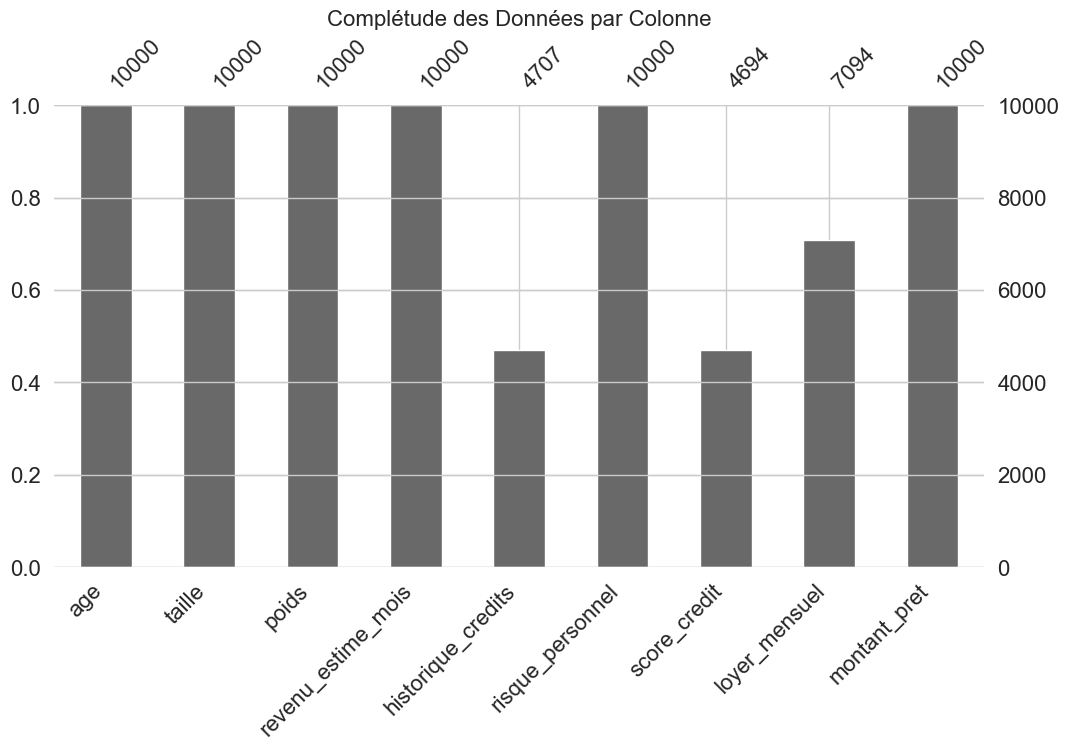

In [6]:
# Graphique à barres : quantifie le nombre de valeurs non manquantes par colonne
msno.bar(df_original, figsize=(12, 6))
plt.title('Complétude des Données par Colonne', fontsize=16)

Text(0.5, 1.0, 'Heatmap de Corrélation des Données Manquantes')

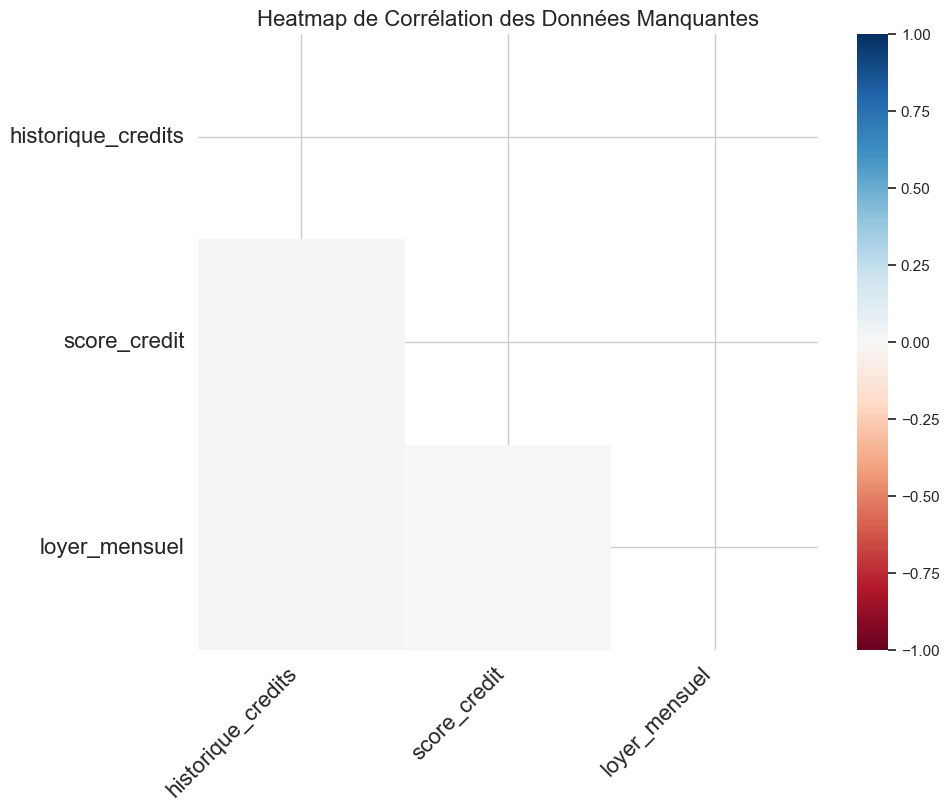

In [7]:
# Heatmap : montre la corrélation de nullité entre les colonnes
# Une valeur proche de 1 signifie que si une donnée manque dans une colonne, elle manque probablement dans l'autre.
# Une valeur proche de -1 signifie que si une donnée est présente, l'autre est probablement absente.
msno.heatmap(df_original, figsize=(10, 8))
plt.title('Heatmap de Corrélation des Données Manquantes', fontsize=16)

### 2.2. Analyse Statistique et Détection des Outliers

In [8]:
# Statistiques descriptives pour un aperçu numérique
df_original.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,46.516500,170.003760,70.064080,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,16.832845,10.006542,15.014911,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,18.000000,119.200000,10.500000,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,75.000000,209.800000,145.200000,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


**Observation :** Le `min` de `loyer_mensuel` est négatif (-395.25), ce qui est une erreur de donnée évidente.

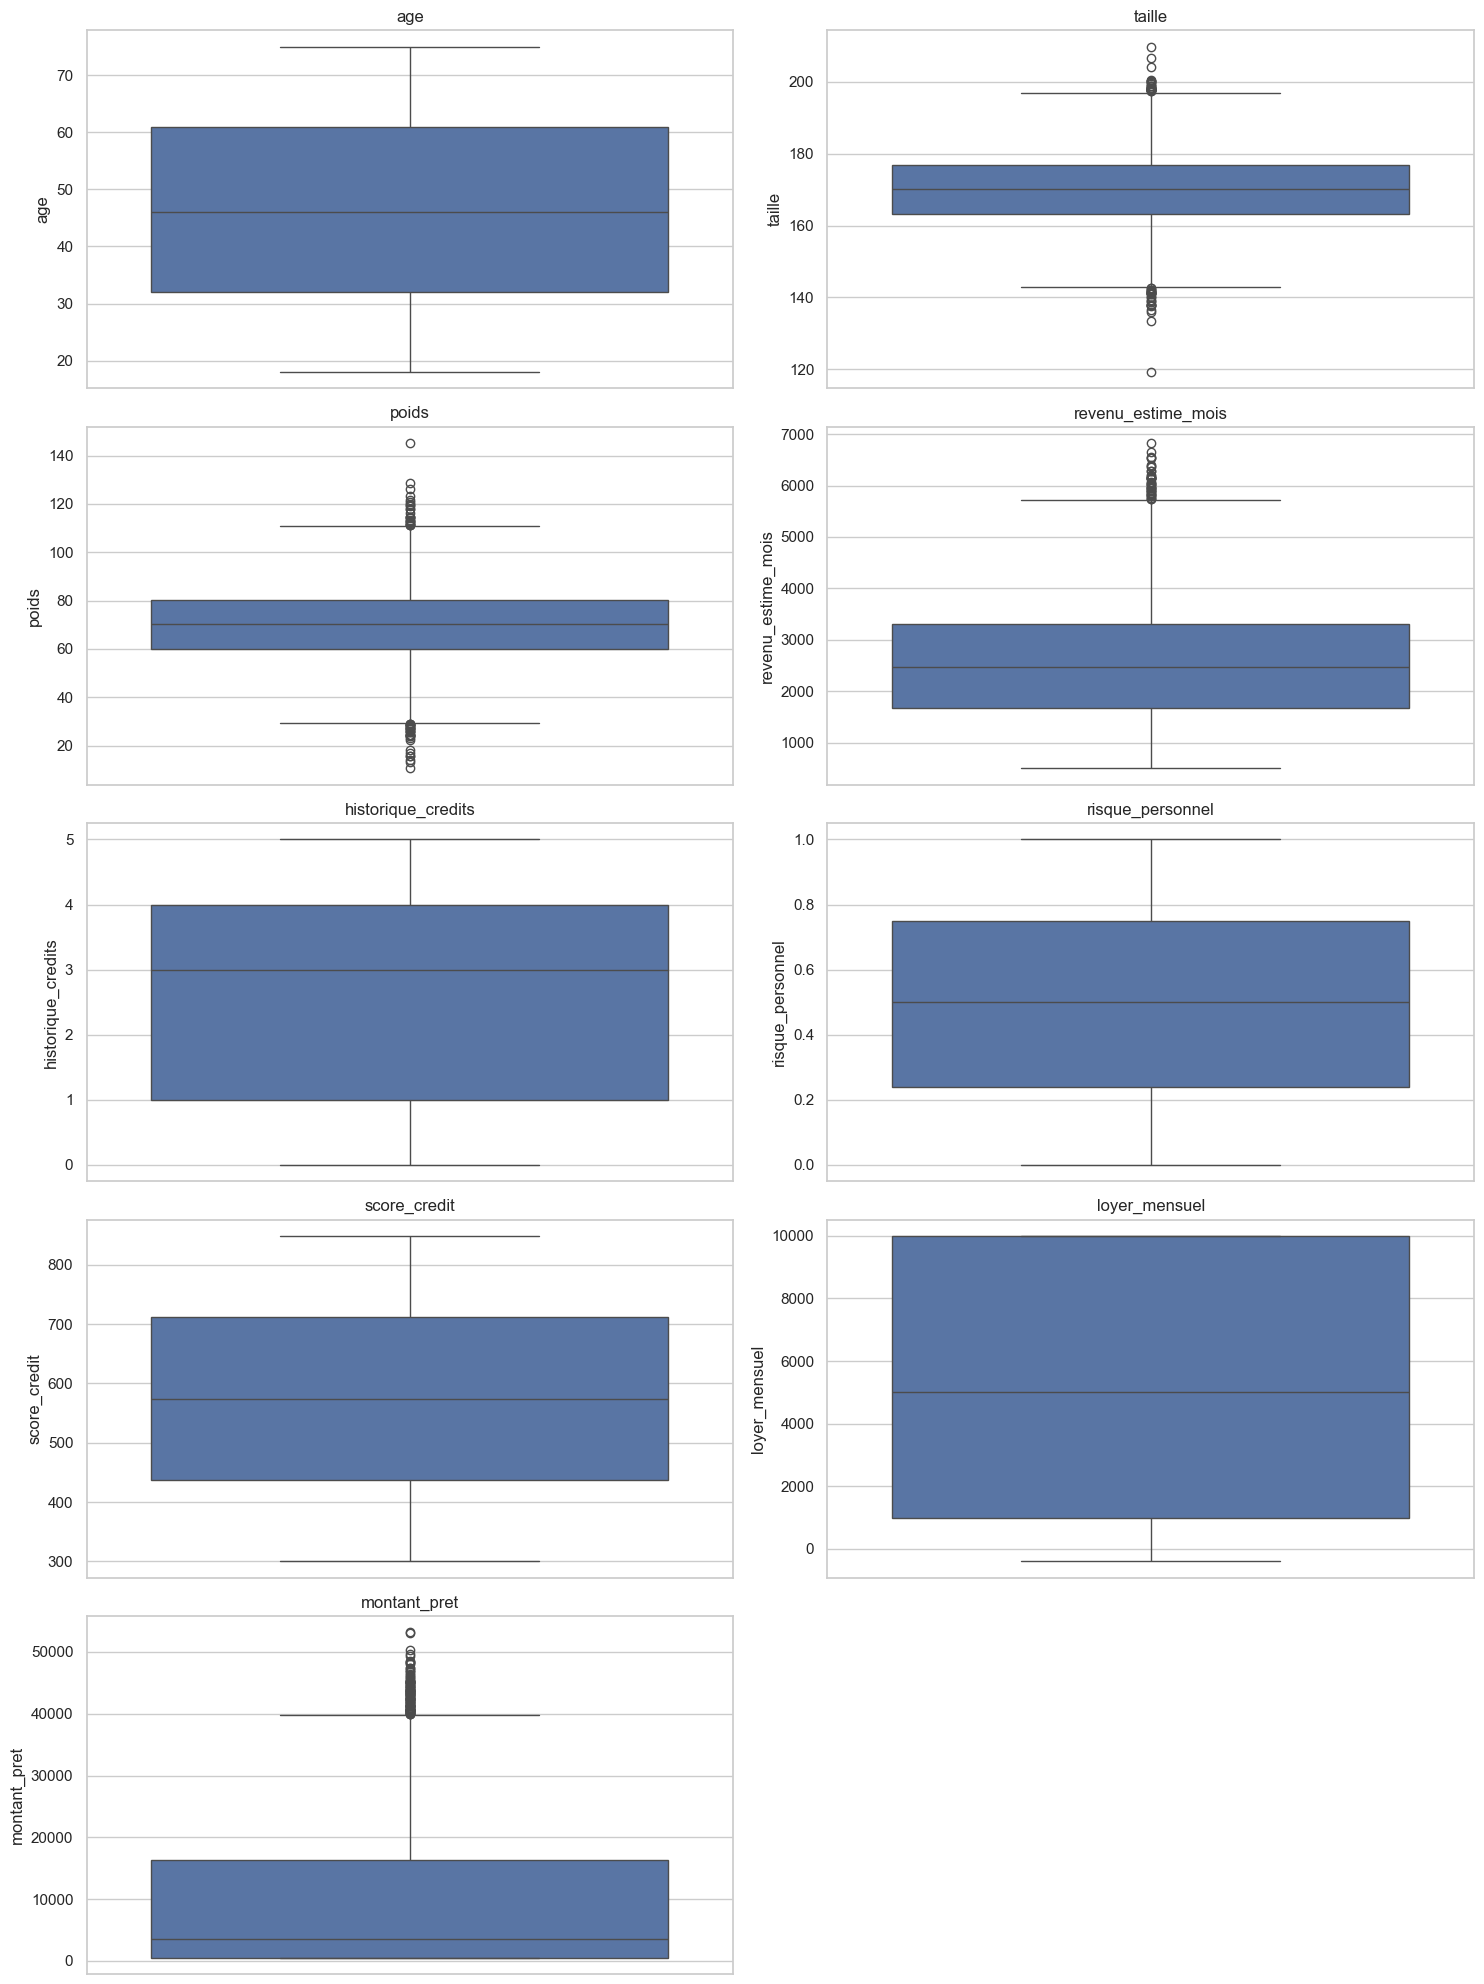

In [ ]:
# Création de boxplots pour chaque variable numérique afin de visualiser les outliers
numerical_cols = df_original.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(y=df_original[col])
    plt.title(col)
    plt.tight_layout()

### 2.3. Visualisation des Distributions

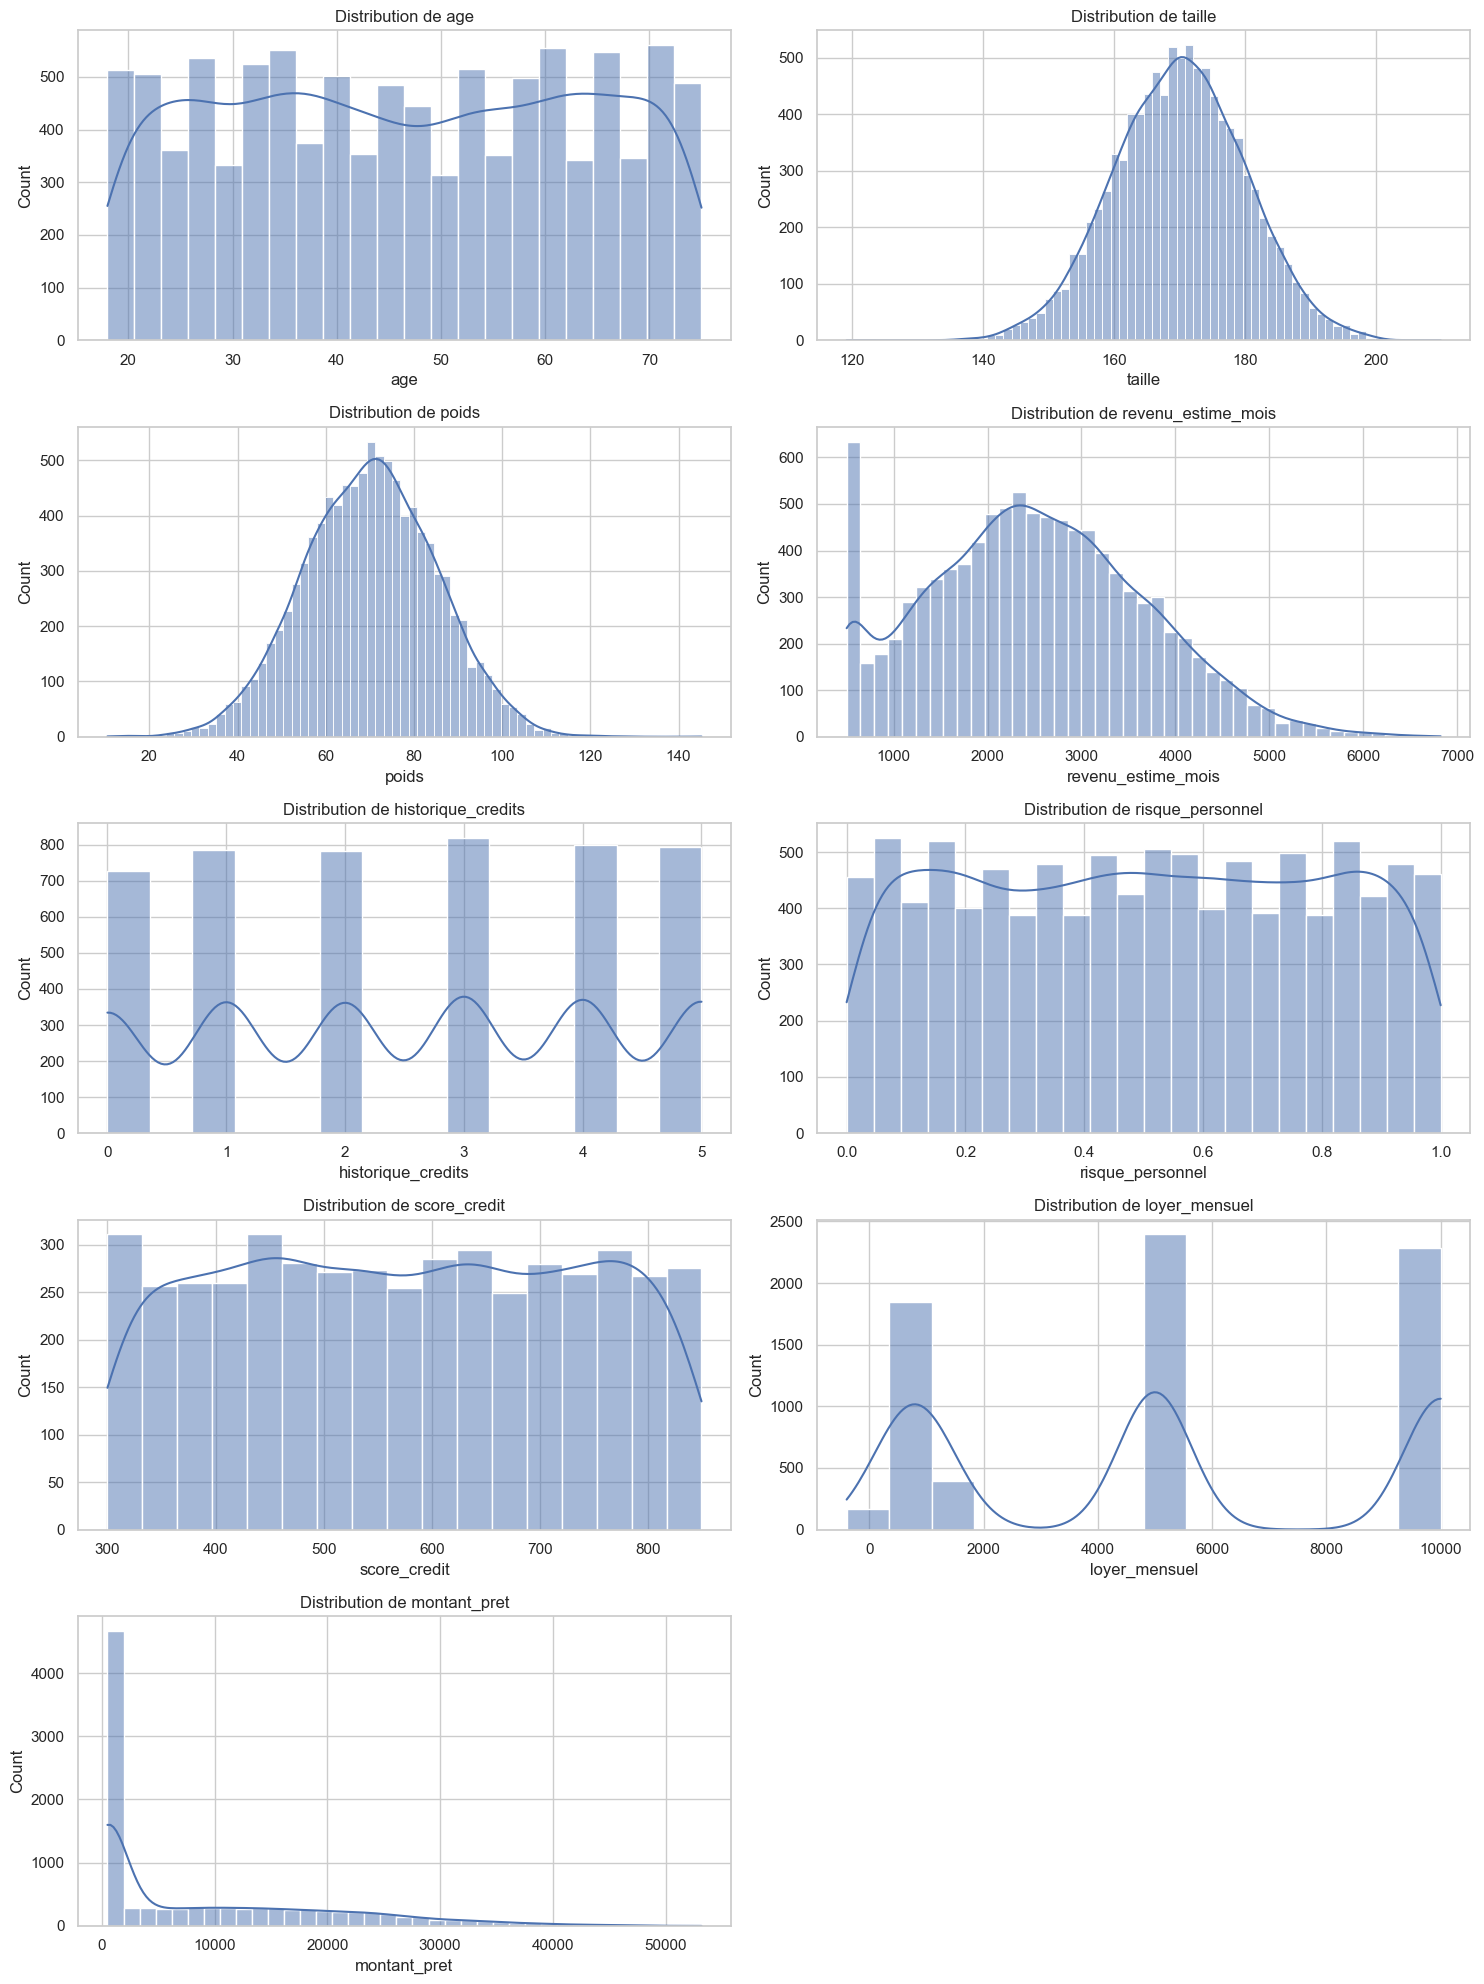

In [10]:
# Histogrammes pour voir la forme de la distribution de chaque variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i + 1)
    sns.histplot(df_original[col].dropna(), kde=True)
    plt.title(f'Distribution de {col}')
    plt.tight_layout()

## Phase 3 : Nettoyage des Données

Maintenant, nous appliquons les corrections basées sur nos observations. Nous travaillons sur une copie du DataFrame pour conserver l'original.

In [11]:
df_cleaned = df_original.copy()

### Étape 1 : Supprimer les Colonnes Quasi-Vides

In [12]:
threshold_col = 50.0
missing_col_percent = df_cleaned.isnull().sum() / len(df_cleaned) * 100
cols_to_drop = missing_col_percent[missing_col_percent > threshold_col].index

df_cleaned.drop(columns=cols_to_drop, inplace=True)
print(f"Colonnes supprimées (plus de {threshold_col}% de valeurs manquantes): {list(cols_to_drop)}")
print("Shape après suppression des colonnes:", df_cleaned.shape)

Colonnes supprimées (plus de 50.0% de valeurs manquantes): ['historique_credits', 'score_credit']
Shape après suppression des colonnes: (10000, 7)


### Étape 2 : Correction des Outliers

In [13]:
# Correction du 'loyer_mensuel' négatif en prenant la valeur absolue
df_cleaned['loyer_mensuel'] = df_cleaned['loyer_mensuel'].abs()
print("Valeurs négatives de 'loyer_mensuel' corrigées.")

# Plafonnement (clipping) des outliers pour les colonnes de montant
for col in ['montant_pret', 'revenu_estime_mois']:
    q99 = df_cleaned[col].quantile(0.99)
    df_cleaned[col] = np.where(df_cleaned[col] > q99, q99, df_cleaned[col])
    print(f"Outliers de '{col}' plafonnés à {q99:.2f}.")

Valeurs négatives de 'loyer_mensuel' corrigées.
Outliers de 'montant_pret' plafonnés à 40021.08.
Outliers de 'revenu_estime_mois' plafonnés à 5338.07.


### Étape 3 : Imputation des Valeurs Manquantes

In [14]:
# Imputation avec la médiane pour les colonnes numériques restantes
for col in df_cleaned.select_dtypes(include=np.number).columns:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Valeurs manquantes de '{col}' imputées avec la médiane ({median_val:.2f}).")

print("\nVérification des valeurs manquantes après imputation:")
print(df_cleaned.isnull().sum())

Valeurs manquantes de 'loyer_mensuel' imputées avec la médiane (5000.00).

Vérification des valeurs manquantes après imputation:
age                   0
taille                0
poids                 0
revenu_estime_mois    0
risque_personnel      0
loyer_mensuel         0
montant_pret          0
dtype: int64


C:\Users\vfoucque.STOR-SOLUTIONS\AppData\Local\Temp\ipykernel_15948\1869117468.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)


## Phase 4 : Analyse Comparative Après Nettoyage

In [15]:
print("--- Statistiques descriptives - DONNÉES NETTOYÉES ---")
df_cleaned.describe()

--- Statistiques descriptives - DONNÉES NETTOYÉES ---


,age,taille,poids,revenu_estime_mois,risque_personnel,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,46.516500,170.003760,70.064080,2516.896300,0.499094,5125.077296,9112.951317
std,16.832845,10.006542,15.014911,1146.251701,0.290107,3159.442341,10669.952728
min,18.000000,119.200000,10.500000,500.000000,0.000000,4.870000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,0.240000,5000.000000,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,0.500000,5000.000000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,0.750000,5000.000000,16245.534725
max,75.000000,209.800000,145.200000,5338.070000,1.000000,10000.000000,40021.079040


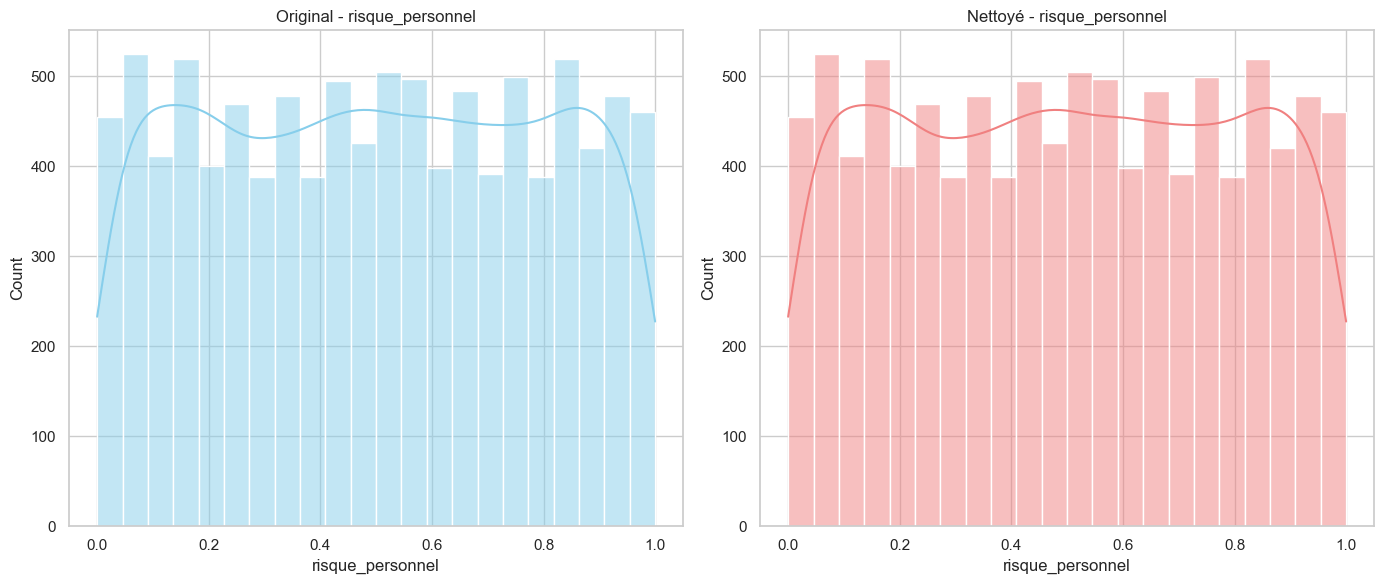

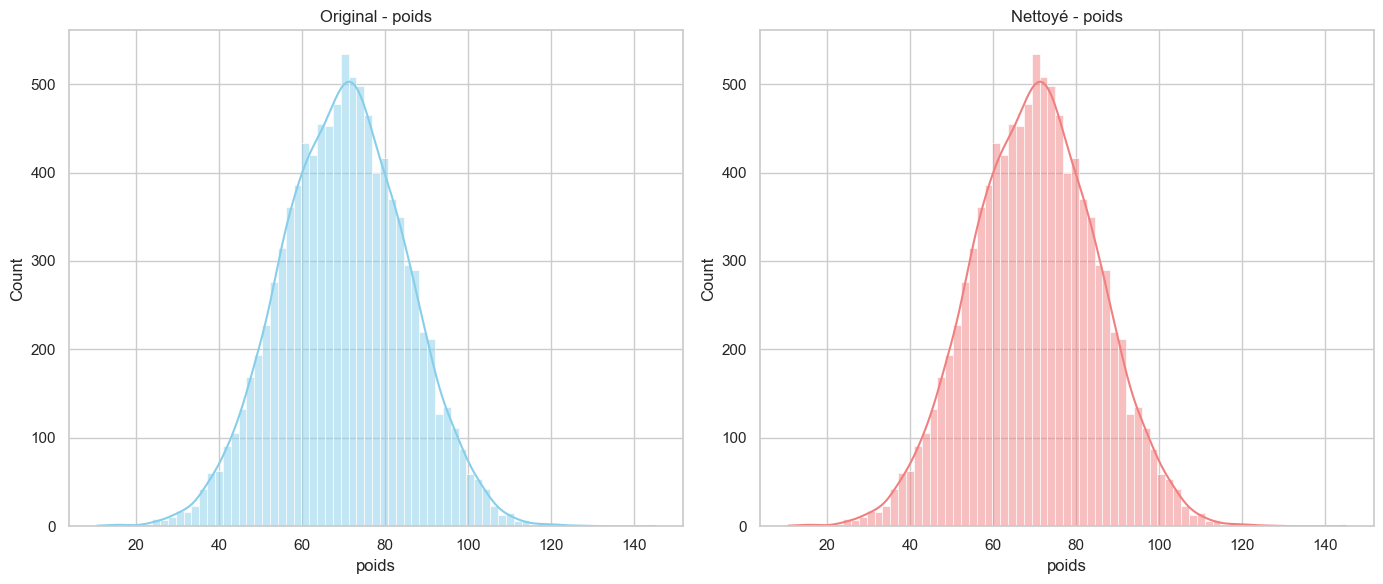

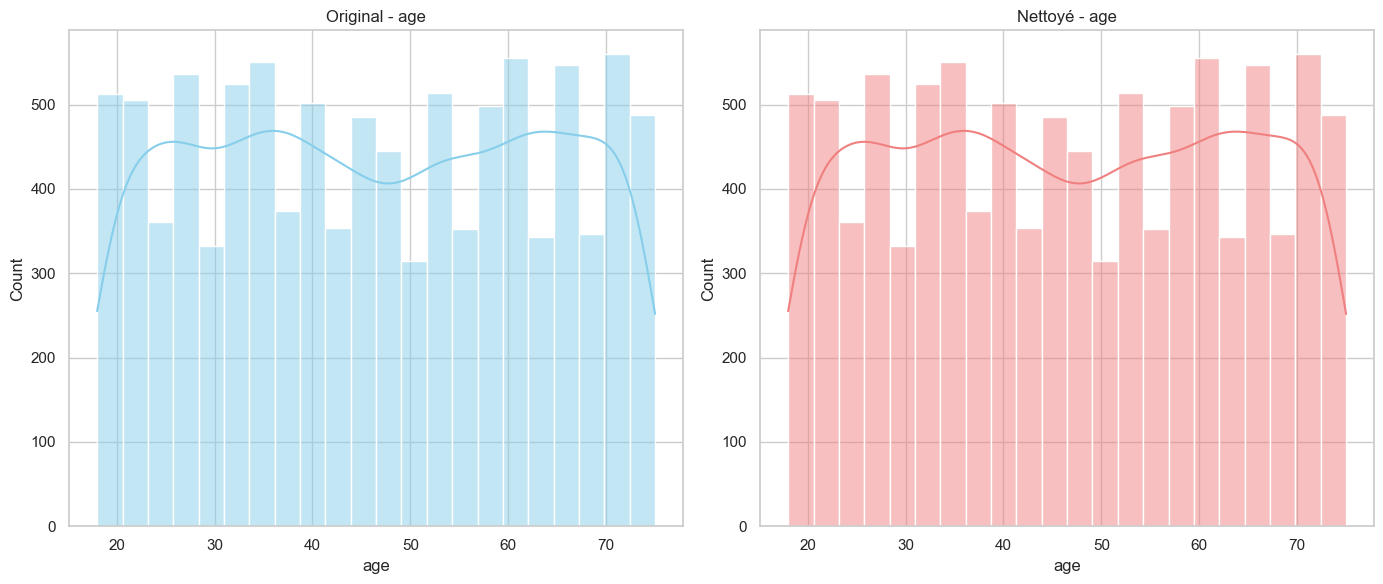

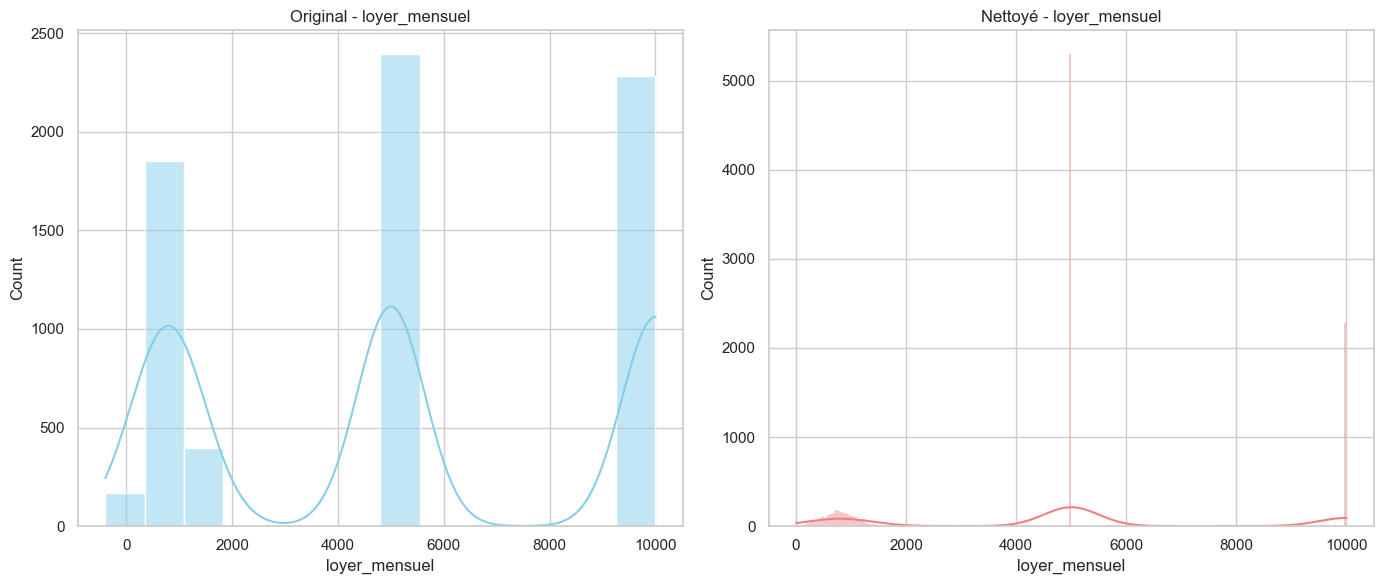

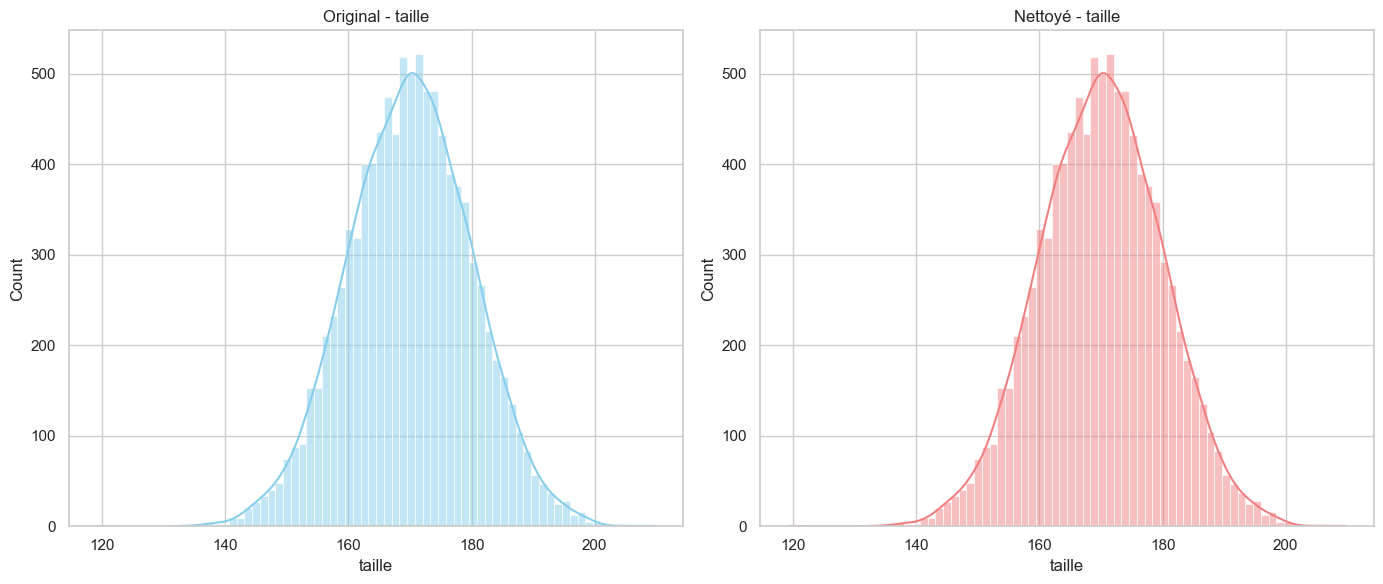

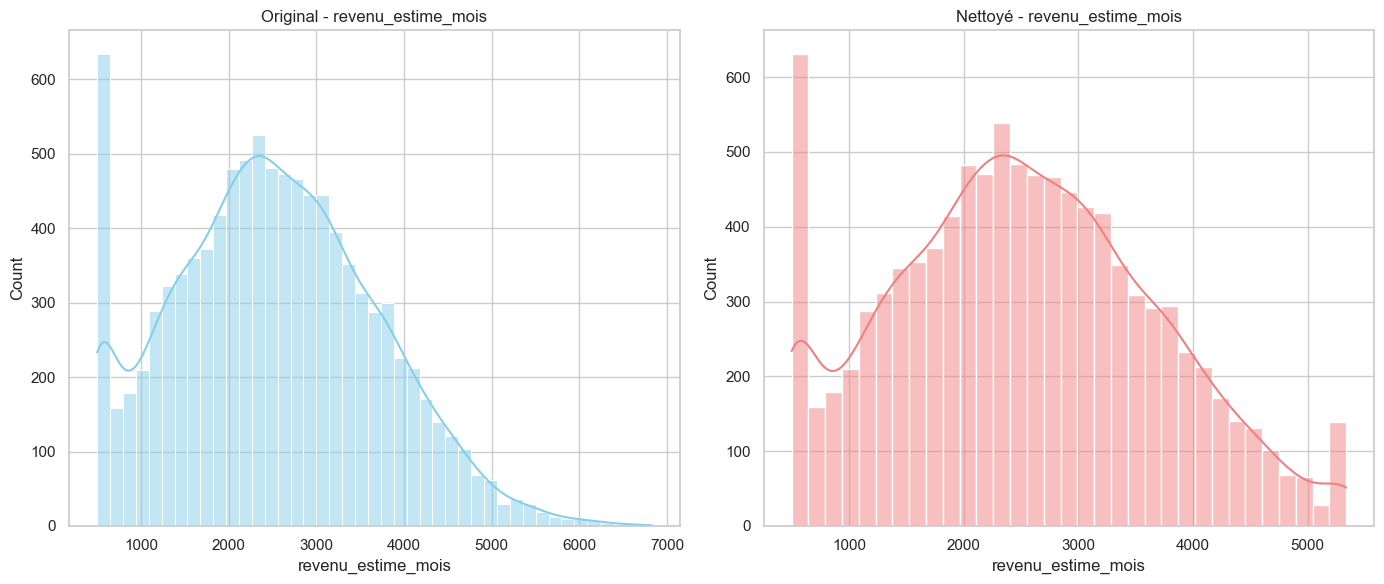

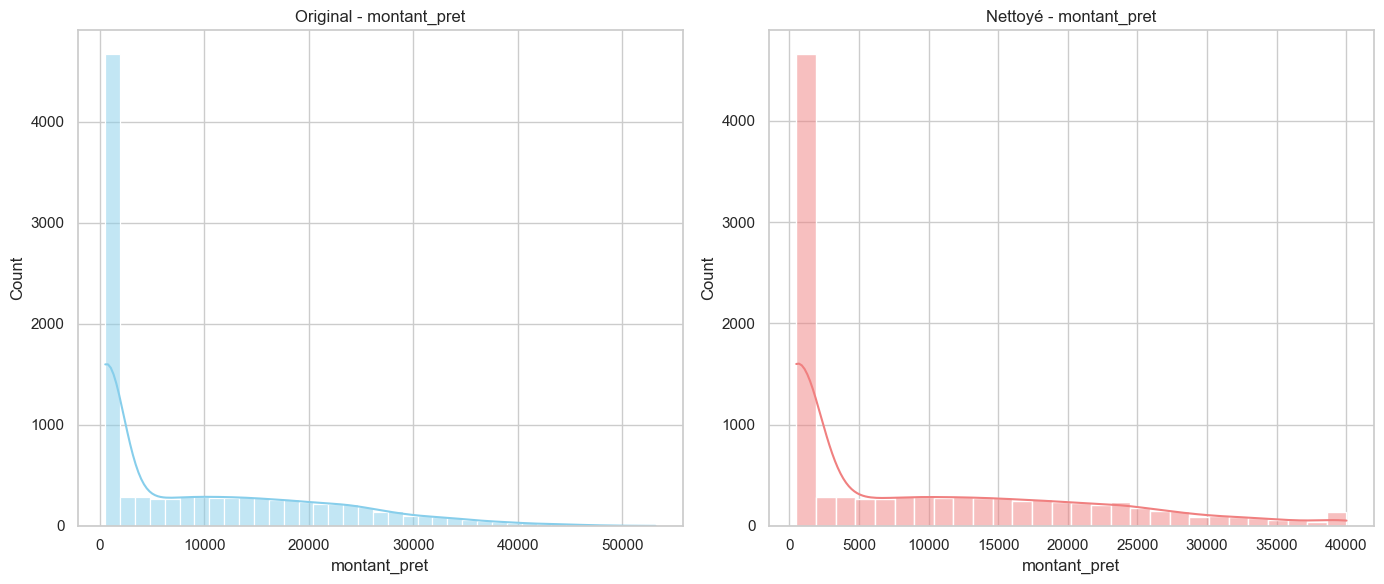

In [16]:
# Comparaison visuelle des distributions avant et après nettoyage
common_cols = list(set(df_original.columns) & set(df_cleaned.columns) & set(numerical_cols))

for col in common_cols:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Original - {col}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[col], kde=True, color='lightcoral')
    plt.title(f'Nettoyé - {col}')
    
    plt.tight_layout()
    plt.show()

## Conclusion

Le processus de nettoyage a permis de traiter les principales anomalies du jeu de données :
- Les colonnes trop vides ont été supprimées.
- Les erreurs de saisie et les valeurs extrêmes ont été corrigées,
    - Toutes les valeurs manquantes ont été imputées de manière robuste.
    
Le jeu de données `df_cleaned` est maintenant plus fiable et prêt à être utilisé pour l'entraînement de modèles